In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"F:\User_Data - Arindam Dev.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
x=data.iloc[:,2:4]
x.head(2)

,Age,EstimatedSalary
0,19,19000
1,35,20000


In [6]:
y=data.iloc[:,4:5]
y.head(2)

,Purchased
0,0
1,0


In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)


In [28]:
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=15)
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [29]:
ypred=classifier.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(ytest, ypred)

In [31]:
cm

array([[42,  3],
       [ 4, 31]], dtype=int64)

[Text(167.4, 181.2, 'X[0] <= 0.476\nentropy = 0.922\nsamples = 320\nvalue = [212, 108]'),
 Text(83.7, 108.72, 'X[1] <= 0.699\nentropy = 0.574\nsamples = 228\nvalue = [197, 31]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.197\nsamples = 196\nvalue = [190, 6]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.758\nsamples = 32\nvalue = [7, 25]'),
 Text(251.10000000000002, 108.72, 'X[1] <= -0.807\nentropy = 0.642\nsamples = 92\nvalue = [15, 77]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.196\nsamples = 33\nvalue = [1, 32]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.791\nsamples = 59\nvalue = [14, 45]')]

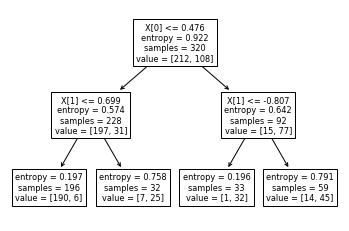

In [32]:
tree.plot_tree(classifier)

In [22]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(ytest, ypred))


The classification report is as follows...

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.91      0.89      0.90        35

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [23]:
classifier1 = RandomForestClassifier(n_estimators = 50)
classifier1.fit(xtrain, ytrain)

E:\pytohn\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
ypred1=classifier1.predict(xtest)

In [25]:
ypred1

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[42  3]
 [ 4 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.91      0.89      0.90        35

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

Accuracy: 0.9125


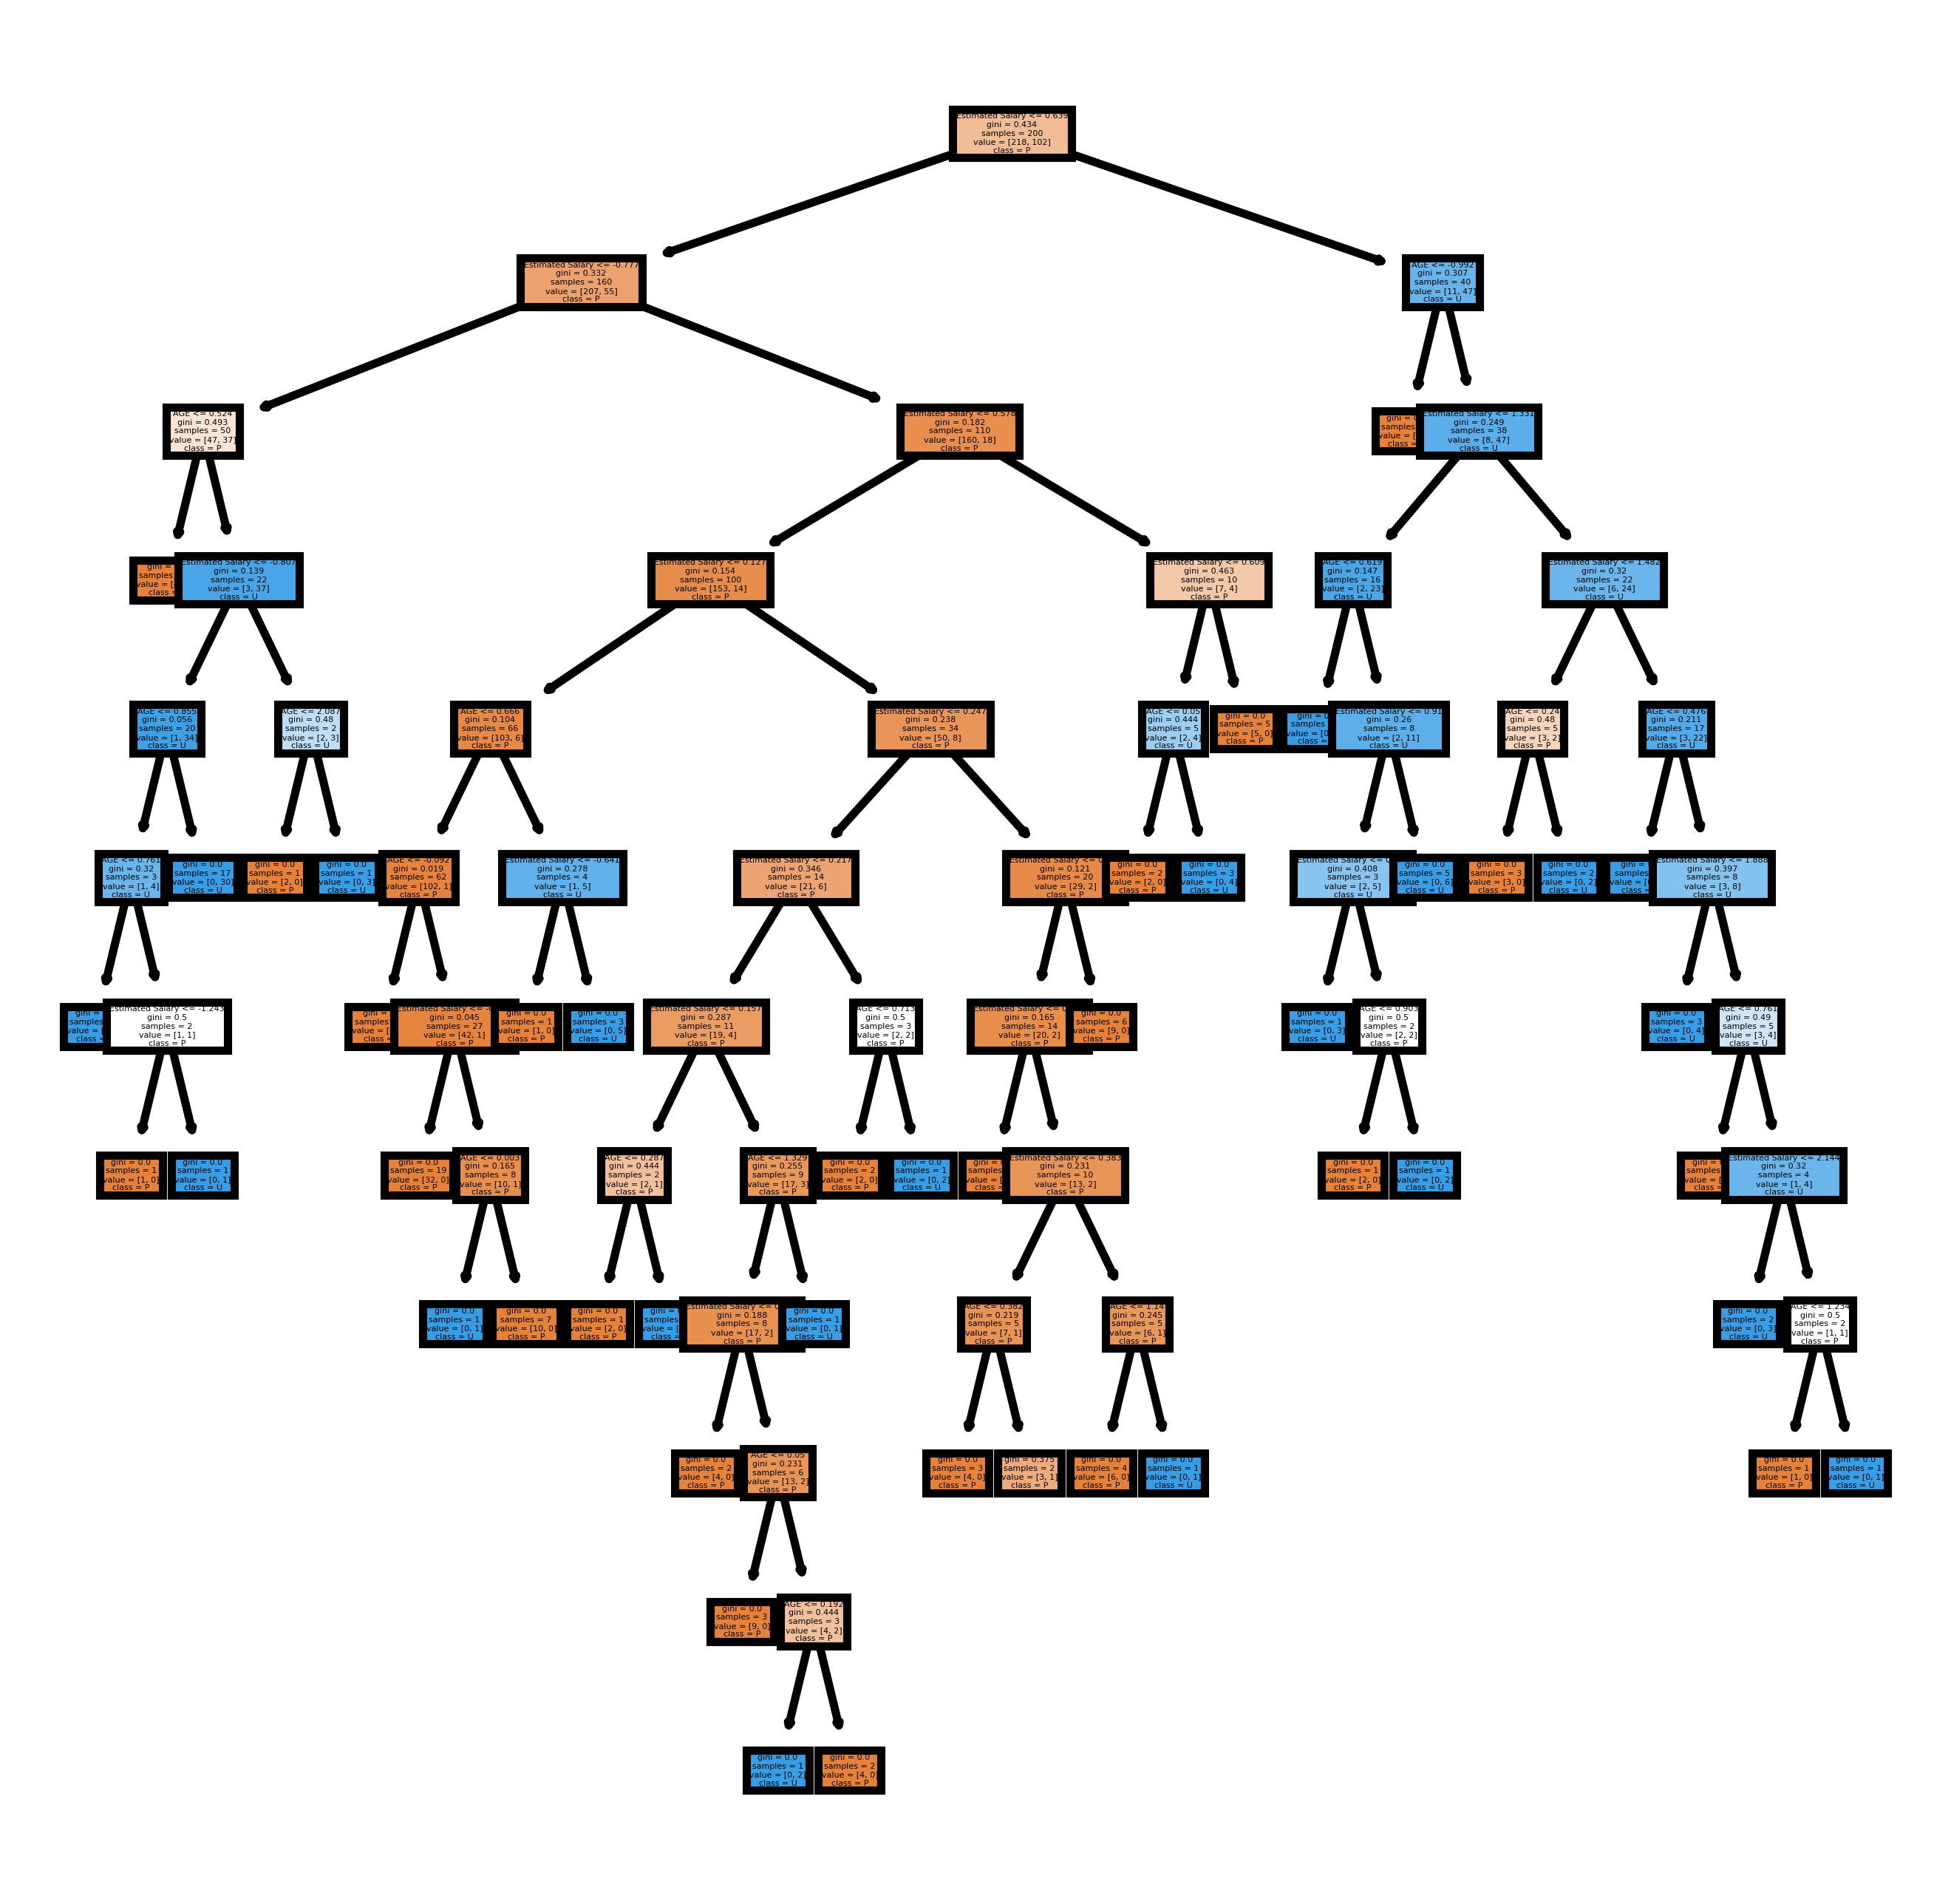

In [27]:
fn='AGE',"Estimated Salary"
cn='PURCHASED'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier1.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);